In [1]:
#Import module
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import stdev
from statistics import mean
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

Normalized_data_dpleo_20200122_run028g.ipynb
Normalized_data_dpleo_20200122_run028g.png
dpleo_20200122_run028g.dat
dpleo_20200122_run028g.inp
dpleo_20200122_run028g5.dat
lmfit_dpleo_20150319_run032g.egr
lmfit_dpleo_20150319_run032g.ing
range_dpleo_20200122_run028g.out
y_max_Normalized_data_dpleo_20200122_run028g.in
y_min_Normalized_data_dpleo_20200122_run028g.in


In [3]:
#### 1. Input file: change 2 input files
#Please change the input file
InputFile = open("dpleo_20200122_run028g.inp",'r').readlines()
N_InputFile = len(InputFile)

#Read data
BJD_time = []
exp_time = []
Flux_12 = []
Flux_err_12 = []
weight_factor = []
subdivision = []

#Please change the input file
for line in open("dpleo_20200122_run028g.inp"):
    li=line.strip()
    if not li.startswith("#"):
        BJD_time.append(float(li.split(" ")[0]))
        exp_time.append(float(li.split(" ")[1]))
        Flux_12.append(float(li.split(" ")[2]))
        Flux_err_12.append(float(li.split(" ")[3]))
        weight_factor.append(float(li.split(" ")[4]))
        subdivision.append(float(li.split(" ")[5]))

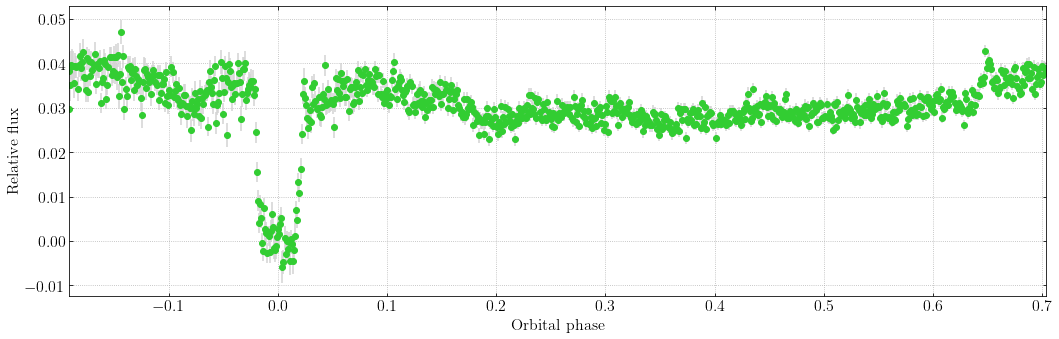

In [4]:
#### 2. Convert BJD time to orbital phase
#################################################################################
t0 = 2458871.1943340
P = 0.06236286

#Set the range of phase to refine the model using star1/2
#ra_12 = -0.04
#rb_12 = 0.04

range_input = []
range_dat = []
#Determine the phase maximum
for i in range(len(BJD_time)):
    Phase = (BJD_time[i] - t0)/P
#    if Phase >= ra_12 and Phase <= rb_12 :
#        print ('%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i,BJD_time[i],Phase, Flux_12[i],Flux_err_12[i]))
    range_input.append('%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i,BJD_time[i],Phase, Flux_12[i],Flux_err_12[i]))
 #       print('%0.6f\t%0.6f\t%0.6f\t%0.6f\t%0.0f\t%0.0f' %(BJD_time[i], exp_time[i], Flux_12[i], Flux_err_12[i], weight_factor[i], subdivision[i]))
    range_dat.append('%0.6f %0.6f %0.6f %0.6f %0.0f %0.0f' %(BJD_time[i], exp_time[i], Flux_12[i], Flux_err_12[i], weight_factor[i], subdivision[i]))


data_out = range_input
f = open("range_dpleo_20200122_run028g.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

data_lroche = range_dat
f = open("dpleo_20200122_run028g.dat", 'w')
for i in range(len(data_lroche)):
    f.write(str(data_lroche[i])+ '\n')
f.close()

#### 3. Plot graph to obtain the result
InputFile_1 = "range_dpleo_20200122_run028g.out"
Data_1   = np.genfromtxt(InputFile_1)

N_Data_1 = len(Data_1)
#print(N_Data_1)

#Read data
Phase = Data_1[:,2]
Flux_12 = Data_1[:,3]
Flux_err_12 = Data_1[:,4]


##Plotgraph: Relative flux vs. orbital phase of Star1/Star2
fig = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(15, 5), tight_layout=True)
plt.xlim(Phase[1], Phase[-1])
plt.xlabel('Orbital phase')
plt.ylabel('Relative flux')
##
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
#
#
#ax0.errorbar(Phase, Flux_12, yerr=Flux_err_12, fmt='o', color='gold', alpha = 1.0, markersize='3.00', label = 'data\_star32')
#

plt.errorbar(Phase, Flux_12, yerr= Flux_err_12, fmt='o', color='limegreen',
                    ecolor='lightgray')

#plt.text(0.023, 0, '20140331\_run028')
#fig.align_ylabels()
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=700)
#plt.legend()
#plt.savefig("Unbinned_Data_binning_dpleo_20140112_run022kg5.png")
plt.grid(linestyle='dotted')
plt.show()

In [5]:
#Input data to to the flux normalization
bjd = BJD_time
x = Phase
y = Flux_12
y_err = Flux_err_12
weight = weight_factor
sub = subdivision

In [6]:
#Set the range of phase to do the flux normalization
#Maximum phase average
a = float("-0.04")
b = float("-0.03")

#Set the range of phase to do the flux normalization
#Minimum phase average
c = float("-0.010")
d = float("0.0010")

In [7]:
#Arrrays
bjd_a = [i for i in range(len(x))]
phase_a = [i for i in range(len(x))]
flux_a = [i for i in range(len(x))]
fluxe_a = [i for i in range(len(x))]

In [8]:
#Determine the phase maximum
y_max = []
for i in range(len(x)):
    if x[i] >= a and x[i] <= b:
        print ('%0.0f %0.10f %0.6f %0.6f %0.6f %0.0f %0.0f' %(i,bjd[i], x[i], y[i], y_err[i], weight[i], sub[i]))
        y_max.append('%0.0f %0.10f %0.6f %0.6f %0.6f %0.0f %0.0f' %(i,bjd[i], x[i], y[i], y_err[i], weight[i], sub[i]))

data_max = y_max
f = open("y_max_Normalized_data_dpleo_20200122_run028g.in", 'w')
for i in range(len(data_max)):
    f.write(str(data_max[i])+ '\n')
f.close()

#Calculate the average of y_max
InputFile_max = "y_max_Normalized_data_dpleo_20200122_run028g.in"
Data_max   = np.genfromtxt(InputFile_max)

#Read data
max_bjd = Data_max[:,1]
max_Phase = Data_max[:,2]
max_Flux_12 = Data_max[:,3]
max_Flux_err_12 = Data_max[:,4]
weight_factor = Data_max[:,5]

y_max = mean(max_Flux_12)
print ('The baseline maximum is:', y_max)

156 2458871.1918455148 -0.039903 0.035602 0.002687 1 2
157 2458871.1919064904 -0.038926 0.033085 0.002458 1 2
158 2458871.1919674659 -0.037948 0.035655 0.002709 1 2
159 2458871.1920285085 -0.036969 0.039996 0.002311 1 2
160 2458871.1920894841 -0.035991 0.037802 0.002879 1 2
161 2458871.1921505262 -0.035012 0.035713 0.002741 1 2
162 2458871.1922115018 -0.034035 0.027547 0.002863 1 2
163 2458871.1922725439 -0.033056 0.033140 0.002864 1 2
164 2458871.1923335195 -0.032078 0.038741 0.002707 1 2
165 2458871.1923944955 -0.031100 0.038747 0.002658 1 2
166 2458871.1924555376 -0.030121 0.040055 0.002708 1 2
The baseline maximum is: 0.03600754545454545


In [9]:
#Determine the phase minimum
y_min = []
for i in range(len(x)):
    if x[i] >= c and x[i] <= d:
        print ('%0.0f %0.10f %0.6f %0.6f %0.6f %0.0f %0.0f' %(i,bjd[i], x[i], y[i], y_err[i], weight[i], sub[i]))
        y_min.append('%0.0f %0.10f %0.6f %0.6f %0.6f %0.0f %0.0f' %(i,bjd[i], x[i], y[i], y_err[i], weight[i], sub[i]))

data_min = y_min
f = open("y_min_Normalized_data_dpleo_20200122_run028g.in", 'w')
for i in range(len(data_min)):
    f.write(str(data_min[i])+ '\n')
f.close()

#Calculate the average of y_max
InputFile_min = "y_min_Normalized_data_dpleo_20200122_run028g.in"
Data_min   = np.genfromtxt(InputFile_min)

#Read data
min_bjd = Data_min[:,1]
min_Phase = Data_min[:,2]
min_Flux_12 = Data_min[:,3]
min_Flux_err_12 = Data_min[:,4]

y_min = mean(min_Flux_12)
print ('The baseline minimum is:', y_min)

187 2458871.1937356265 -0.009595 -0.002741 -0.002314 1 2
188 2458871.1937966021 -0.008617 0.001218 0.002258 1 2
189 2458871.1938566458 -0.007654 -0.002481 -0.002432 1 2
190 2458871.1939176219 -0.006677 0.002326 0.002476 1 2
191 2458871.1939785974 -0.005699 0.006155 0.002594 1 2
192 2458871.1940396396 -0.004720 0.003106 0.002375 1 2
193 2458871.1941006151 -0.003742 -0.001470 -0.002523 1 2
194 2458871.1941616572 -0.002764 -0.002095 -0.002740 1 2
195 2458871.1942226328 -0.001786 -0.001020 -0.003076 1 2
196 2458871.1942836754 -0.000807 0.000835 0.003002 1 2
197 2458871.1943446510 0.000171 0.002751 0.002966 1 2
The baseline minimum is: 0.0005985454545454545


In [10]:
######### ignore 0/0 #########
np.seterr(divide='ignore', invalid='ignore')
##############################
# Normalized flux calculation #
##############################
for i in range(len(x)):
    normalized = (y[i]-y_min)/(y_max-y_min)
    normalized_err = (y_max-y_min)*y_err[i]/(y_max-y_min)**2
    phase_a[i] = x[i]
    flux_a[i] = normalized
    fluxe_a[i] = normalized_err
#    print (x[i], normalized, normalized_err)

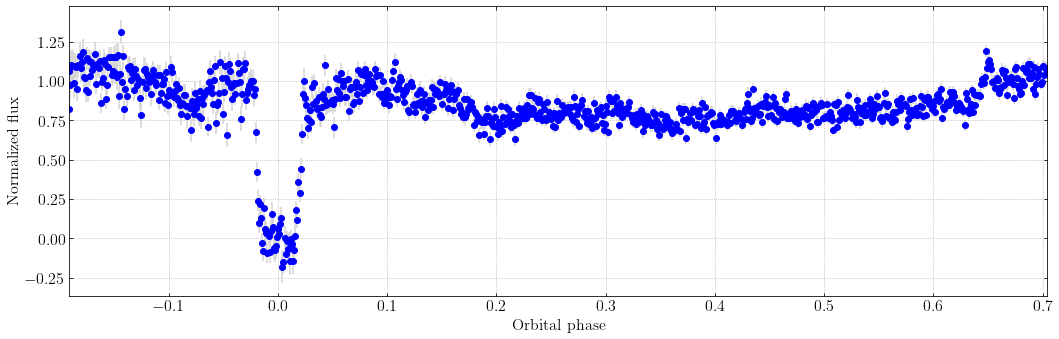

In [11]:
#Plotgraph before we are going to do the flux normalization
#fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x_a, n_a, yerr=ne_a, fmt='+', color='blue')
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.errorbar(phase_a, flux_a, yerr= fluxe_a, fmt='o', color='blue',
                    ecolor='lightgray')
plt.xlim(phase_a[0],phase_a[-1])
plt.xlabel('Orbital phase')
plt.ylabel('Normalized flux')
plt.grid(linestyle='dotted')
#plt.savefig("2013_12_28_run009_uzfor_12_Normalized.png")
plt.savefig("Normalized_data_dpleo_20200122_run028g.png")
plt.show()

In [12]:
#New input file for lroche
p_start = -0.04
p_end = 0.04
lroche_input = []
for i in range(len(x)):
    if x[i] >= p_start and x[i] <= p_end :
        BJD_time = (Phase*P) + t0
        exp = exp_time
#        print('%0.10f %0.6f %0.6f %0.6f %0.0f %0.0f' %(BJD_time[i], exp[i], flux_a[i], fluxe_a[i], weight[i], sub[i]))
        lroche_input.append('%0.10f %0.6f %0.6f %0.6f %0.0f %0.0f' %(BJD_time[i], exp[i], flux_a[i], fluxe_a[i], weight[i], sub[i]))
    
data_lroche = lroche_input
f = open("dpleo_20200122_run028g.dat", 'w')
for i in range(len(data_lroche)):
    f.write(str(data_lroche[i])+ '\n')
f.close()

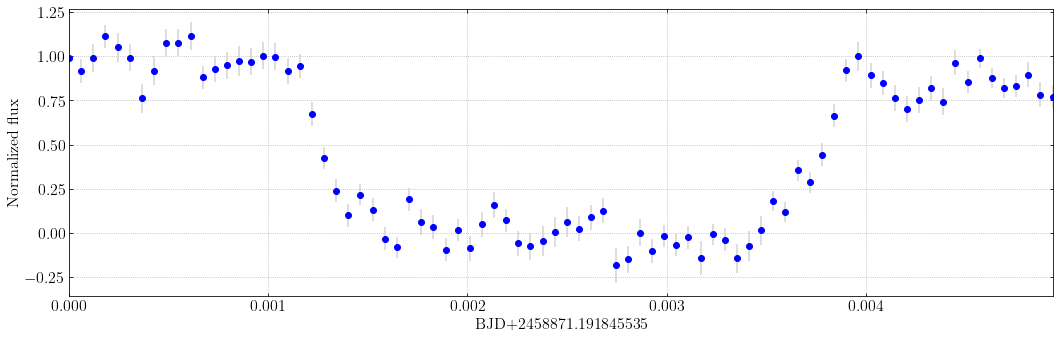

In [13]:
InputFile_1 = "dpleo_20200122_run028g.dat"
Data_1   = np.genfromtxt(InputFile_1)

N_Data_1 = len(Data_1)
#print(N_Data_1)

#Read data
BJD_time = Data_1[:,0]
N = BJD_time[0]
BJD = BJD_time - N
Flux_12 = Data_1[:,2]
Flux_err_12 = Data_1[:,3]

fig = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')
plt.xlim(BJD[0], BJD[-1])

plt.errorbar(BJD, Flux_12, yerr=Flux_err_12, fmt='o', color='blue',
                    ecolor='lightgray')
plt.xlabel('BJD+'+str(N))
plt.ylabel('Normalized flux')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename)
plt.grid(linestyle='dotted')
plt.show()